<div align="center" style=" font-size: 80%; text-align: center; margin: 0 auto">
<img src="https://raw.githubusercontent.com/Explore-AI/Pictures/master/Python-Notebook-Banners/Examples.png"  style="display: block; margin-left: auto; margin-right: auto;";/>
</div>

# Examples: Support vector machines and model tuning
© ExploreAI Academy

In this train, we will delve into support vector machines (SVMs) and the art of model tuning. We will
gain insights into the working principles of SVMs and the role of kernels. By exploring both linear and non-linear SVM classifiers using sklearn, we will discover the significance of hyperplanes and their visualisation.

## Learning objectives
By the end of this train, you should be able to:

- Understand the basics of the support vector machine (SVM) model and how it works.
- Fit an SVM classifier model using the `sklearn` library and the `linear` and `rbf` kernels.
- Understand and visualise the hyperplane of an SVM classifier model. 
- Tune an SVM model using the `GridSearchCV` function.



## Support vector machine

How do support vector machines work? 

The concept itself is quite simple. Let's pretend that we want to classify data points into group $A$ or group $B$. To do this, an SVM will plot our labelled training data as points in space and will look for the widest, clearest gap between points belonging to group A and points belonging to group B. It will then use this newly identified dividing line (known as a hyperplane) and the margin around it to classify new observations. An unseen data point will be classified into group A or B depending on which side of the margin it is closest to. 

It's easy to do this when our data only has two features. We only need a simple one-dimensional decision boundary (which is basically a line) to classify the data. However, as more features get added the line needs to take on more dimensions because a simple line will no longer work. A line only has one dimension. A flat shape has two dimensions. A 3D shape (unsurprisingly) has three. What do we call something with four or more dimensions? In this case, it's a hyperplane. In SVM, the hyperplane will always have one less dimension ($-1$) than the number of input features ($p$), or a total of $(p-1)$ dimensions.

To explain it in more technical terms, the basic idea of the SVM is to separate points using a $(p - 1)$ dimensional hyperplane. What does it mean to separate points? This means that the SVM will construct a decision boundary such that points on the left are assigned a label of $A$ and points on the right are assigned a label of $B$.  When finding this separating hyperplane, we wish to maximise the distance of the nearest points to the hyperplane. The technical term for this is **maximum separating hyperplane**. The data points that dictate where the separating hyperplane goes are called **support vectors**. Have a look at a diagram of the margin, hyperplane, and support vectors below: 


<div align="center" style=" font-size: 80%; text-align: center; margin: 0 auto">
<img src="https://raw.githubusercontent.com/Explore-AI/Pictures/master/support_vector_machine_diagram.jpeg"  style="display: block; margin-left: auto; margin-right: auto;";/>
</div>



Read more about SVMs and how they work [here](https://en.wikipedia.org/wiki/Support_vector_machine).

SVMs are interesting models. Like logistic regression, they fit a linear decision boundary. However, unlike logistic regression, SVMs do this in a non-probabilistic way and are able to fit to non-linear data using an algorithm known as the [kernel trick](https://en.wikipedia.org/wiki/Kernel_method). Furthermore, SVMs can be used for both classification and regression. In `sklearn`, these are called `SVC` (support vector classifier) and `SVR` (support vector regression) respectively. 

One important note: SVC can also refer to support vector **clustering**, so make sure to not get the two confused!

### Getting started 

First we import the libraries that we will need.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

import warnings
warnings.filterwarnings("ignore")

### Generate synthetic data

Now we'll generate a random dataset to experiment with. We do this by taking a multi-dimensional
standard normal distribution and defining classes separated by nested
concentric multi-dimensional spheres such that roughly equal numbers of
samples are in each class (quantiles of the $\chi^2$ distribution).

The less technical explanation for this is that we've generated a doughnut-shaped dataset, where the samples belonging to one class are generally located in the centre, and the samples belonging to the other class are generally located in the outer ring.

**Note:** Don't worry if you don't understand how this works right now. The most important thing is to know that we have a synthetic dataset with a specific structure.

In [2]:
from sklearn.datasets import make_gaussian_quantiles

# Set the feature dimensionality
p = 2

# Construct the dataset
X, y = make_gaussian_quantiles(cov=3.,
                                 n_samples=1000, n_features=p,
                                 n_classes=2, random_state=1)

Now let's perform the train/test split:

In [3]:
# get training and testing data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Fit an SVM classifier with a linear decision boundary
We are going to fit an SVM classifier with a `linear kernel`. This means that we are telling the SVC to fit the data using a linear decision boundary. Let's also take a look at the accuracy score:

In [4]:
from sklearn.svm import SVC

svc = SVC(kernel='linear')
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)

print("The accuracy score of the SVC is:", accuracy_score(y_test, y_pred))
print("\n\nClassification Report:\n\n", classification_report(y_test, y_pred))

The accuracy score of the SVC is: 0.6133333333333333


Classification Report:

               precision    recall  f1-score   support

           0       0.58      0.83      0.68       150
           1       0.70      0.39      0.50       150

    accuracy                           0.61       300
   macro avg       0.64      0.61      0.59       300
weighted avg       0.64      0.61      0.59       300



### Plot the decision boundary for the SVC
That accuracy score doesn't seem very good. Why do you think that is? To help us understand what's going on, we can use a visualisation.

As mentioned before, the SVC calculates and implements a $p-1$ dimensional decision boundary (hyperplane) over the input features. Since we are only looking at two features (our synthetic dataset only has two features, or $p=2$), our hyperplane will only have 1 dimension ($p-1$), so it's going to look like a single line.

It should be noted that if our model has more than two features the we can plot the hyperplane for any two features we choose. Below, we'll visualise the hyperplane for the two features in the dataset:

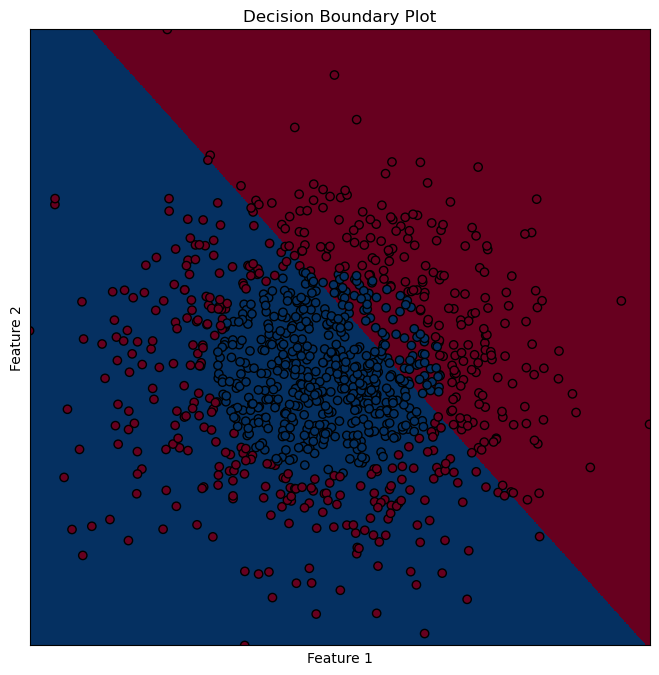

In [5]:
i = 0 # Feature 1
j = 1 # Feature 2

svc.fit(X[:, [i, j]], y)
fig = plt.figure(figsize=(8, 8))
ax1 = fig.add_subplot(111)
 
x_min, x_max = X[:, i].min(), X[:, i].max()
y_min, y_max = X[:, j].min(), X[:, j].max()
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 1000), np.linspace(y_min, y_max, 1000))

y_hat = svc.predict(np.concatenate((xx.reshape(-1,1), yy.reshape(-1,1)), axis=1))
y_hat = y_hat.reshape(xx.shape)

ax1.pcolormesh(xx, yy, y_hat, cmap=plt.cm.get_cmap('RdBu_r'))
ax1.scatter(X[:, i], X[:, j], c=y, edgecolors='k', cmap=plt.cm.get_cmap('RdBu_r'))
ax1.set_xlabel('Feature 1')
ax1.set_ylabel('Feature 2')
ax1.set_title('Decision Boundary Plot') 
ax1.set_xlim(xx.min(), xx.max())
ax1.set_ylim(yy.min(), yy.max())
ax1.set_xticks(())
ax1.set_yticks(())
plt.show()

Do we see the problem here? The doughnut-shaped data are not `linearly separable`, i.e. a linear decision boundary is unable to adequately separate this data. 

So let's make use of SVM's [kernel trick](https://en.wikipedia.org/wiki/Kernel_method) to use a **non-linear** decision boundary instead.

### Fit an SVC with a non-linear decision boundary

For the next section, we're going to use a radial basis function kernel, or `rbf` kernel, which allows the SVC to fit a non-linear decision boundary. You can read more about `rbf` [here](https://en.wikipedia.org/wiki/Radial_basis_function_kernel) and about the effect of this kernel's parameters [here](https://scikit-learn.org/stable/auto_examples/svm/plot_rbf_parameters.html#:~:text=Intuitively%2C%20the%20gamma%20parameter%20defines,the%20model%20as%20support%20vectors.).

Let's train a model on our synthetic data using the `rbf` kernel and see if it improves the accuracy:

In [6]:
svc = SVC(kernel='rbf')
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)

print("The accuracy score of the SVC is:", accuracy_score(y_test, y_pred))
print("\n\nClassification Report:\n\n",classification_report(y_test, y_pred))

The accuracy score of the SVC is: 0.9833333333333333


Classification Report:

               precision    recall  f1-score   support

           0       0.98      0.99      0.98       150
           1       0.99      0.98      0.98       150

    accuracy                           0.98       300
   macro avg       0.98      0.98      0.98       300
weighted avg       0.98      0.98      0.98       300



As we can see, this is a **much** better result. Let's visualise our decision boundary to see why.

### Plot the decision boundary for the SVC using the non-linear `rbf` kernel

Once again we will plot the 1-dimensional decision boundary between the two features present in our synthetic dataset:

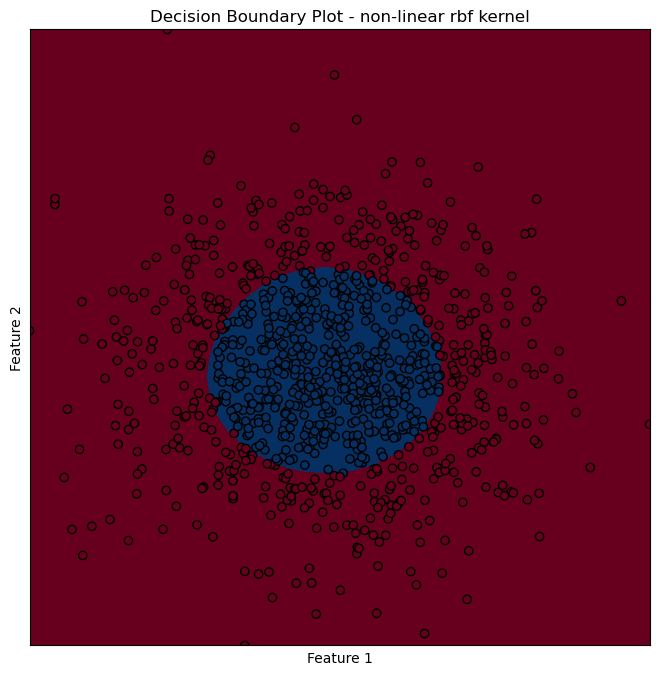

In [7]:
i = 0 # Feature 1
j = 1 # Feature 2

svc.fit(X[:, [i, j]], y)
fig = plt.figure(figsize=(8, 8))
ax1 = fig.add_subplot(111)
 
x_min, x_max = X[:, i].min(), X[:, i].max()
y_min, y_max = X[:, j].min(), X[:, j].max()
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 1000), np.linspace(y_min, y_max, 1000))

y_hat = svc.predict(np.concatenate((xx.reshape(-1,1), yy.reshape(-1,1)), axis=1))
y_hat = y_hat.reshape(xx.shape)

ax1.pcolormesh(xx, yy, y_hat, cmap=plt.cm.get_cmap('RdBu_r'))
ax1.scatter(X[:, i], X[:, j], c=y, edgecolors='k', cmap=plt.cm.get_cmap('RdBu_r'))
ax1.set_xlabel('Feature 1')
ax1.set_ylabel('Feature 2')
ax1.set_title('Decision Boundary Plot - non-linear rbf kernel') 
ax1.set_xlim(xx.min(), xx.max())
ax1.set_ylim(yy.min(), yy.max())
ax1.set_xticks(())
ax1.set_yticks(())
plt.show()

Clearly the `rbf` kernel is a better fit to our data and results in a better-performing model. If we hadn't changed our parameters and tried a different kernel, we would have thought that our SVC did not perform well on the data and could possibly have discarded it. This highlights the importance of optimising the parameters of a model.

Optimising a model is a well-known concept and is known as **model tuning**. Fortunately, `sklearn` provides some tools for us to do this easily.

## Tuning an SVC model

You have probably noticed that the models in the `sklearn` library have quite a few parameters, right? It's possible to use a process called **model tuning** to find the best possible set of parameters for a model. For this purpose, we will use `sklearn`'s [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html). This procedure allows us to specify a set of possible parameters for a specific model. `GridSearchCV` will then go through those parameters and try every possible combination of them (kind of like it's working through a grid in a systematic way – that's where the name comes from). `GridSearchCV` will then return the combination of parameters that resulted in a model with the best score. 

What metric does it use to calculate the score? It will depend on the model being tested or if we specify our own metric. You should check out exactly how this works on your own! We should also note that `GridSearchCV` makes use of **cross-validation**, helping to ensure the robustness of its results.

Let's try it out. The first thing to do is to create a dictionary that contains the parameters we want to tune as `keys` and all the different options we want to test for those parameters as `values`.

In [8]:
parameters = {'kernel':('linear', 'rbf'), 
              'C':(0.25,1.0),
              'gamma': (1,2)}

Now, we instantiate an SVC classifier and tell `GridSearchCV` to test it using the parameters we previously specified:

In [9]:
svm = SVC()
clf = GridSearchCV(svm, parameters)
clf.fit(X_train,y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': (0.25, 1.0), 'gamma': (1, 2),
                         'kernel': ('linear', 'rbf')})

Next, let's make some predictions using our newly tuned model:

In [10]:
y_opt = clf.predict(X_test)
# Print accuracy scores for tuned and untuned models
print("Accuracy for untuned model: ", accuracy_score(y_test, y_pred))
print("Accuracy for tuned model: ", accuracy_score(y_test, y_opt))

Accuracy for untuned model:  0.9833333333333333
Accuracy for tuned model:  0.9666666666666667



In our scenario, the untuned model with a linear kernel achieved a higher accuracy of 98.33% compared to the tuned model with an `rbf` kernel, which had an accuracy of 96.67%. The untuned linear model performed better due to the inherent **simplicity of the linear decision boundary**, which was effective in separating the classes in the dataset. However, despite the lower accuracy, the tuned `rbf` model offers several advantages. Firstly, it has the **flexibility to capture non-linear relationships** in the data, which may result in better generalisation to unseen data in more complex datasets. Additionally, the process of hyperparameter tuning using techniques like GridSearchCV allows for **optimisation of model performance** by finding the best combination of hyperparameters. Even though the untuned model performed well in this case, using a tuned model is essential for maximising model performance, ensuring robustness and improving generalisation to diverse datasets and real-world scenarios.

Here are a few things to note about `GridSearchCV`. It takes a base model (in this case, an SVC classifier) and a grid of parameters (our `parameters` dictionary) as input. By default, `GridSearchCV` will continuously refit the model until it finds the model with the best combination of parameters and will return it to the user. Here, we saved the best model as `clf`.

We can also get the parameters of the best-performing model as follows:

In [11]:
clf.best_params_

{'C': 1.0, 'gamma': 1, 'kernel': 'rbf'}

**Note**: Depending on the model we are choosing, the number of parameters we are tuning, and the size and complexity of the dataset we are using, `GridSearchCV` can take a lot of time and processing power to perform. Therefore, it's often wise to limit the number and range of the parameters we are testing at once.

#  

<div align="center" style=" font-size: 80%; text-align: center; margin: 0 auto">
<img src="https://raw.githubusercontent.com/Explore-AI/Pictures/master/ExploreAI_logos/EAI_Blue_Dark.png"  style="width:200px";/>
</div>